<a href="https://colab.research.google.com/github/Hidetsune/SemEval2024_Task4/blob/main/SemEval_2024_Task_4_data_preparation_Hidetsune_Takahashi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import json

In [ ]:
import re

#Datasets
id_list_before  : a list that has all the ids of sentences seen before



In [ ]:
id_list_before = []

##Training Data

In [ ]:
json_open_train = open("/content/drive/MyDrive/SemEval Task4/train.json","r")  # train.json
json_load_train = json.load(json_open_train)
train_json = json_load_train
train_json

[{'id': '35807',
  'text': 'DONALD TRUMP: BARACK\\nOBAMA AND JOE BIDEN\\nWILL BE IMPLICATED IN\\nRUSSIA HOAX\\nAP Photo/Pablo Martinez Monsivais',
  'image': 'prop_meme_6570.png',
  'label': 'propagandistic'},
 {'id': '30562',
  'text': "00\\n10% FOR\\nTHE BIG GUY\\nNANCY'S\\nCUT\\n@ImMeme0\\nTHO\\n10% FOR\\nTHE BIG\\nGUY",
  'image': 'prop_meme_8346.png',
  'label': 'propagandistic'},
 {'id': '44163',
  'text': "To much political posting online\\nthese days, so here's just a nice\\nphoto of a happy kitty",
  'image': 'prop_meme_24378.png',
  'label': 'non_propagandistic'},
 {'id': '24224',
  'text': "I DON'T THINK\\nYOU UNDERSTOOD\\nWHAT I SAID.\\nYOU DON'T\\n13\\nTRUST THE\\nSCIENCE\\nNO\\nI DON'T TRUST\\nEPSTEIN'S\\nFRIEND WHO'S\\nNOT A SCIENTIST\\n",
  'image': 'prop_meme_2594.png',
  'label': 'propagandistic'},
 {'id': '31611',
  'text': "ⒸSergey Mihailicenko/Anadolu Agency via Getty Images\\nXXIBEK 203 2022\\nНЕТ\\nЯДЕРНОму\\nоружию\\nВО ВСЕМ МИРЕ\\nНемедленно ЗАКЛЮЧИТЬ\\ngorobop

In [ ]:
train_data = pd.DataFrame(columns = [ "text", "propagandistic/non_propagandistic"])
train_data

,text,propagandistic/non_propagandistic


In [ ]:
train_text_list = []    # text
train_label_list = []   # propagandistic/non_propagandistic
for utterance in train_json:
  if not utterance["id"] in id_list_before:
    try:
      if utterance["text"].isascii():    # excluding non-English sentences and their labels
        #print(utterance["text"].strip())
        #utterance["text"].replace("\\n", " ")
        train_text_list.append(utterance["text"].replace("\\n", " ").lower())    # replacing new-line-character, lowering the sentence and appending to the list
        train_label_list.append(utterance["label"])
        id_list_before.append(utterance["id"])
    except AttributeError:
      continue
  else:
    continue

In [ ]:
train_data["text"] = train_text_list
train_data["propagandistic/non_propagandistic"] = train_label_list

In [ ]:
train_data

,text,propagandistic/non_propagandistic
0,donald trump: barack obama and joe biden will ...,propagandistic
1,00 10% for the big guy nancy's cut @immeme0 th...,propagandistic
2,"to much political posting online these days, s...",non_propagandistic
3,i don't think you understood what i said. you ...,propagandistic
4,"if a liberal from 1960 showed up in 2018, he w...",non_propagandistic
...,...,...
1107,which one of these devil worshippers do you al...,propagandistic
1108,joe biden is transplanting hundreds of thousan...,propagandistic
1109,the independent review brought on by republica...,propagandistic
1110,longtime white house photographer pete souza w...,propagandistic


In [ ]:
import seaborn as sns                       #visualization
%matplotlib inline
sns.set(color_codes=True)

<Axes: xlabel='propagandistic/non_propagandistic', ylabel='count'>

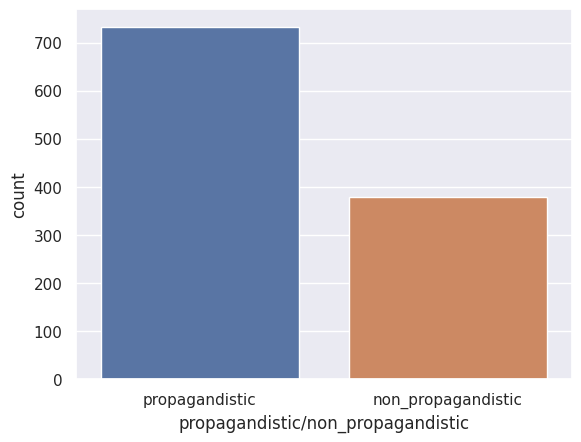

In [ ]:
sns.countplot(data = train_data , x = 'propagandistic/non_propagandistic')
#Oh...no...! There is a data imbalance

##Validation Data

In [ ]:
json_open_val = open("/content/drive/MyDrive/SemEval Task4/val.json","r")  # val.json
json_load_val = json.load(json_open_val)
val_json = json_load_val
val_json

[{'id': '46916',
  'text': 'Thank you!\\nfor signing the\\nTERM LIMITS ON\\nCONGRESS\\nPLEDGE\\nU.S. Term Limits Pledge\\nI, Rick Lindsay, pledge that as a member of the state\\nlegislature I will cosponsor, vote for, and defend the\\nresolution applying for an Article V convention for the sole\\npurpose of enacting term limits on Congress.\\ntermlimits.com/pledge\\nRick Lindsay\\n(Signature, Date)\\nRisk\\n(Name Printed)\\nU.S.\\nTERM\\nLIMITS\\n(Witness Signature)\\n(Witness Name Printed)\\nU.S. Term Limits/ ago Connecticut Ave NW, Suite zoo/ Washington, D.C. 20036\\nPhone: 200-261-3332 Pledges can be emailed to Press@termlimits.com\\nU.S.\\nRick Lindsey\\nTERM\\nLIMITS Candidate for Kansas State House District 86',
  'image': 'prop_meme_15428.png',
  'label': 'non_propagandistic'},
 {'id': '35775',
  'text': 'S&P 500 RISES TO RECORD\\nHIGH, PASSES\\nPREPANDEMIC\\nFIRST TIME\\nTOP FOR\\nNYSE\\nTOGETHE\\nSTRONG.\\nNYSE\\nPhoto by JOHANNES EISELE/AFP via Getty Images',
  'image': 'prop

In [ ]:
val_data = pd.DataFrame(columns = [ "text", "propagandistic/non_propagandistic"])
val_data

,text,propagandistic/non_propagandistic


In [ ]:
val_text_list = []    # text
val_label_list = []   # propagandistic/non_propagandistic
for utterance in val_json:
  if not utterance["id"] in id_list_before:
    try:
      if utterance["text"].isascii():    # excluding non-English sentences and their labels
        #print(utterance["text"].strip())
        #utterance["text"].replace("\\n", " ")
        val_text_list.append(utterance["text"].replace("\\n", " ").lower())    # replacing new-line-character, lowering the sentence and appending to the list
        val_label_list.append(utterance["label"])
        id_list_before.append(utterance["id"])
    except AttributeError:
      continue
  else:
      continue

In [ ]:
len(val_text_list) == len(val_label_list)

True

In [ ]:
val_data["text"] = val_text_list
val_data["propagandistic/non_propagandistic"] = val_label_list

In [ ]:
val_data

,text,propagandistic/non_propagandistic
0,thank you! for signing the term limits on cong...,non_propagandistic
1,"s&p 500 rises to record high, passes prepandem...",propagandistic
2,wake up you are not free sponsored by anti new...,propagandistic
3,president a normal walking a dog not golding n...,propagandistic
4,future facebook bot showing me the meme i made...,propagandistic
...,...,...
134,197 nazi ain't got no humanity they're the foo...,propagandistic
135,hang onthave a meme for this,non_propagandistic
136,"he gave his blood, sweat and tears for the ame...",propagandistic
137,but i wanted north korea to nuke us to make tr...,propagandistic


<Axes: xlabel='propagandistic/non_propagandistic', ylabel='count'>

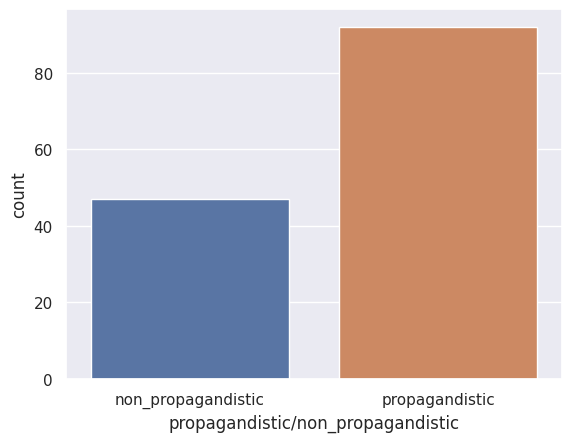

In [ ]:
sns.countplot(data = val_data , x = 'propagandistic/non_propagandistic')
#Oh...no...! There is data imbalance

##Train data of Subtask 1

In [ ]:
json_open_subtask1_train = open("/content/drive/MyDrive/SemEval Task4/Subtask 1 data (used for Subtask 2b)/train.json","r")  # train.json
json_load_subtask1_train = json.load(json_open_subtask1_train)
subtask1_train_json = json_load_subtask1_train
subtask1_train_json

[{'id': '65635',
  'text': 'THIS IS WHY YOU NEED\\n\\nA SHARPIE WITH YOU AT ALL TIMES',
  'labels': ['Black-and-white Fallacy/Dictatorship'],
  'link': 'https://www.facebook.com/photo/?fbid=4023552137722493&set=g.633131750534436'},
 {'id': '67927',
  'text': 'GOOD NEWS!\\n\\nNAZANIN ZAGHARI-RATCLIFFE AND ANOOSHEH ASHOORI HAVE BEEN RELEASED\\n\\nAfter years of being unjustly detained in Iran, they are making their way safely back to the UK.',
  'labels': ['Loaded Language', 'Glittering generalities (Virtue)'],
  'link': 'https://www.facebook.com/amnesty/photos/5311988665480629/'},
 {'id': '68031',
  'text': 'PAING PHYO MIN IS FREE!',
  'labels': [],
  'link': 'https://www.facebook.com/amnesty/photos/4274191309260375/'},
 {'id': '77490',
  'text': 'Move your ships away!\\n\\noooook\\n\\nMove your ships away!\\n\\nNo, and I just added 10 more',
  'labels': [],
  'link': 'https://www.facebook.com/rightpatriots/photos/pb.100064494145299.-2207520000./606109399734747/?type=3'},
 {'id': '67641

In [ ]:
subtask1_train_data = pd.DataFrame(columns = [ "text", "propagandistic/non_propagandistic"])
subtask1_train_data

,text,propagandistic/non_propagandistic


In [ ]:
subtask1_train_text_list = []    # text
subtask1_train_label_list = []   # propagandistic/non_propagandistic
for utterance in subtask1_train_json:
  if not utterance["id"] in id_list_before:
    try:
      if utterance["text"].isascii():    # excluding non-English sentences and their labels
        #print(utterance["text"].strip())
        #utterance["text"].replace("\\n", " ")
        subtask1_train_text_list.append(utterance["text"].replace("\\n", " ").lower())    # replacing new-line-character, lowering the sentence and appending to the list
        subtask1_train_label_list.append("propagandistic")
        id_list_before.append(utterance["id"])
    except AttributeError:
      continue
  else:
      continue

In [ ]:
len(subtask1_train_text_list) == len(subtask1_train_label_list)

True

In [ ]:
subtask1_train_data

,text,propagandistic/non_propagandistic


In [ ]:
subtask1_train_data["text"] = subtask1_train_text_list
subtask1_train_data["propagandistic/non_propagandistic"] = subtask1_train_label_list

<Axes: xlabel='propagandistic/non_propagandistic', ylabel='count'>

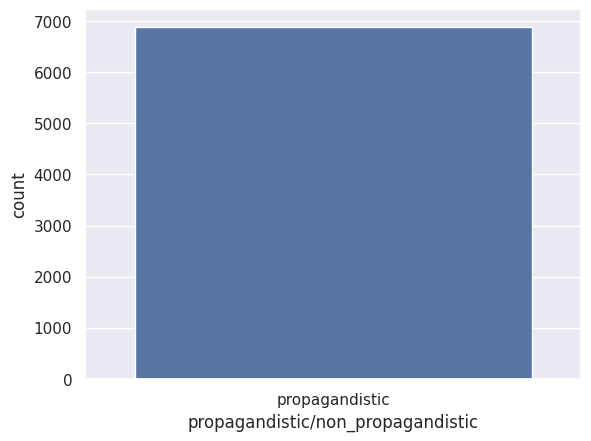

In [ ]:
sns.countplot(data = subtask1_train_data , x = 'propagandistic/non_propagandistic')
#As we meant

#Validataion data of Subtask 1

In [ ]:
json_open_subtask1_val = open("/content/drive/MyDrive/SemEval Task4/Subtask 1 data (used for Subtask 2b)/validation.json","r")  # validation.json
json_load_subtask1_val = json.load(json_open_subtask1_val)
subtask1_val_json = json_load_subtask1_val
subtask1_val_json

[{'id': '63135',
  'text': 'Critical Thinking Essentials\\n\\Are my biases affecting how I examine the issue?\\\\n\\n\\Am I using information that can be verified with reliable data?\\\\n\\n\\Am I basing my position on what I KNOW to be the truth, or what I WANT to be the truth?\\\\n\\n\\I might be wrong.\\ (A little humility goes a long way.)\\n',
  'labels': ['Doubt', 'Slogans'],
  'link': 'https://www.facebook.com/SkepticalMemeSociety/photos/1988061678013703/'},
 {'id': '78590',
  'text': 'Trying to think of a single accomplishment...',
  'labels': ['Exaggeration/Minimisation', 'Smears'],
  'link': 'https://www.facebook.com/unitedstatesherald/photos/3741483306077928/'},
 {'id': '65834',
  'text': "Corporate needs you to find the difference between this picture and this picture\\n\\nThey're the same picture\\n",
  'labels': ['Thought-terminating cliché'],
  'link': 'https://www.facebook.com/photo/?fbid=356249413139805&set=g.292754366127634'},
 {'id': '67394',
  'text': 'KYLE RITTENHO

In [ ]:
subtask1_val_data = pd.DataFrame(columns = [ "text", "propagandistic/non_propagandistic"])
subtask1_val_data

,text,propagandistic/non_propagandistic


In [ ]:
subtask1_val_text_list = []    # text
subtask1_val_label_list = []   # propagandistic/non_propagandistic
for utterance in subtask1_val_json:
  if not utterance["id"] in id_list_before:
    try:
      if utterance["text"].isascii():    # excluding non-English sentences and their labels
        #print(utterance["text"].strip())
        #utterance["text"].replace("\\n", " ")
        subtask1_val_text_list.append(utterance["text"].replace("\\n", " ").lower())    # replacing new-line-character, lowering the sentence and appending to the list
        subtask1_val_label_list.append("propagandistic")
        id_list_before.append(utterance["id"])
    except AttributeError:
      continue
  else:
      continue

In [ ]:
len(subtask1_val_text_list) == len(subtask1_val_label_list)

True

In [ ]:
subtask1_val_data

,text,propagandistic/non_propagandistic


In [ ]:
subtask1_val_data["text"] = subtask1_val_text_list
subtask1_val_data["propagandistic/non_propagandistic"] = subtask1_val_label_list

<Axes: xlabel='propagandistic/non_propagandistic', ylabel='count'>

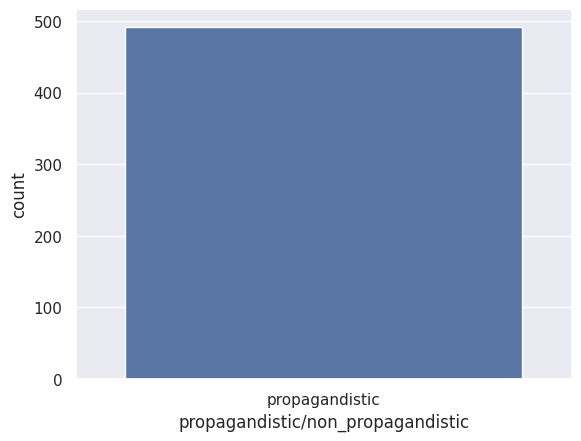

In [ ]:
sns.countplot(data = subtask1_val_data , x = 'propagandistic/non_propagandistic')
#As we meant

#Train data of Subtask 2a

In [ ]:
json_open_subtask2_train = open("/content/drive/MyDrive/SemEval Task4/Subtask 2a (used for Subtask 2b)/train.json","r")  # train.json
json_load_subtask2_train = json.load(json_open_subtask2_train)
subtask2_train_json = json_load_subtask2_train
subtask2_train_json

[{'id': '63292',
  'text': "This is why we're free\\n\\nThis is why we're safe\\n",
  'image': 'prop_meme_556.png',
  'labels': ['Causal Oversimplification', 'Transfer', 'Flag-waving'],
  'link': 'https://www.facebook.com/SilentmajorityDJT/photos/2119966118152814/'},
 {'id': '65635',
  'text': 'THIS IS WHY YOU NEED\\n\\nA SHARPIE WITH YOU AT ALL TIMES',
  'image': 'prop_meme_4839.png',
  'labels': ['Transfer', 'Black-and-white Fallacy/Dictatorship', 'Smears'],
  'link': 'https://www.facebook.com/photo/?fbid=4023552137722493&set=g.633131750534436'},
 {'id': '67927',
  'text': 'GOOD NEWS!\\n\\nNAZANIN ZAGHARI-RATCLIFFE AND ANOOSHEH ASHOORI HAVE BEEN RELEASED\\n\\nAfter years of being unjustly detained in Iran, they are making their way safely back to the UK.',
  'image': 'prop_meme_7653.png',
  'labels': ['Loaded Language', 'Glittering generalities (Virtue)'],
  'link': 'https://www.facebook.com/amnesty/photos/5311988665480629/'},
 {'id': '68031',
  'text': 'PAING PHYO MIN IS FREE!',
  '

In [ ]:
subtask2_train_data = pd.DataFrame(columns = [ "text", "propagandistic/non_propagandistic"])
subtask2_train_data

,text,propagandistic/non_propagandistic


In [ ]:
subtask2_train_text_list = []    # text
subtask2_train_label_list = []   # propagandistic/non_propagandistic
for utterance in subtask2_train_json:
  if not utterance["id"] in id_list_before:
    try:
      if utterance["text"].isascii():    # excluding non-English sentences and their labels
        #print(utterance["text"].strip())
        #utterance["text"].replace("\\n", " ")
        subtask2_train_text_list.append(utterance["text"].replace("\\n", " ").lower())    # replacing new-line-character, lowering the sentence and appending to the list
        subtask2_train_label_list.append("propagandistic")
        id_list_before.append(utterance["id"])
    except AttributeError:
      continue
  else:
      continue

In [ ]:
len(subtask2_train_text_list) == len(subtask2_train_label_list)

True

In [ ]:
subtask2_train_data

,text,propagandistic/non_propagandistic


In [ ]:
subtask2_train_data["text"] = subtask2_train_text_list
subtask2_train_data["propagandistic/non_propagandistic"] = subtask2_train_label_list

<Axes: xlabel='propagandistic/non_propagandistic', ylabel='count'>

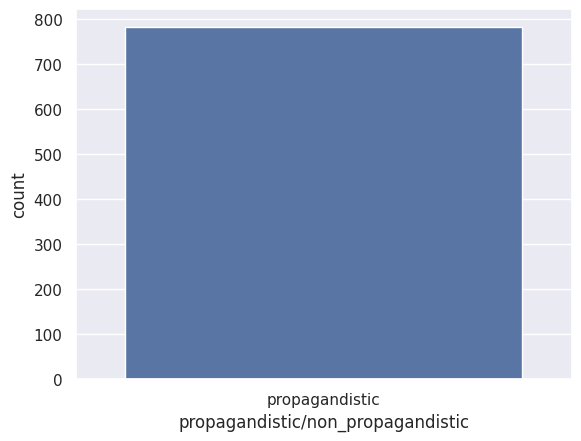

In [ ]:
sns.countplot(data = subtask2_train_data , x = 'propagandistic/non_propagandistic')
#As we meant

#Validation data of Subtask2b

In [ ]:
json_open_subtask2_val = open("/content/drive/MyDrive/SemEval Task4/Subtask 2a (used for Subtask 2b)/validation.json","r")  # val.json
json_load_subtask2_val = json.load(json_open_subtask2_val)
subtask2_val_json = json_load_subtask2_val
subtask2_val_json

[{'id': '63226',
  'text': 'POLL: IF YOU THINK THIS MAN IS MENTALLY ILL\\nLIKE THIS PHOTO\\n\\n',
  'image': 'prop_meme_405.png',
  'labels': ['Loaded Language', 'Smears'],
  'link': 'https://www.facebook.com/SilentmajorityDJT/photos/2235610529921705/'},
 {'id': '64328',
  'text': "\ufeffFAKE NEWS PLANDEMIC\\nVOTER FRAUD\\nOPEN BORDERS\\nFORCED VACCINE\\nDEFUND THE POLICE\\nSTAY AT HOME ORDERS\\nRIOTS ACROSS AMERICA\\nSOROS HELPING FILL D.A. POSITIONS LEAVING OUR GEAR IN AFGHANISTAN AMERICANS LEFT TRAPPED IN AFGHANISTAN TURNING OVER ALLIE NAMES TO \\nTHE TALIBAN\\n\\nThese were all links in the same chain. They were all planned well in advance with hundreds aiding in America's takeover.\\n\\nThey say such talk is just a foolish conspiracy theory. But a conspiracy is just another word for making a plan. Are we to believe that evil people do not plan?\\n\\nIf your grocer always gives you the wrong change and it is always in his favor, he is not bad at math. ",
  'image': 'prop_meme_4269.

In [ ]:
subtask2_val_data = pd.DataFrame(columns = [ "text", "propagandistic/non_propagandistic"])
subtask2_val_data

,text,propagandistic/non_propagandistic


In [ ]:
subtask2_val_text_list = []    # text
subtask2_val_label_list = []   # propagandistic/non_propagandistic
for utterance in subtask2_val_json:
  if not utterance["id"] in id_list_before:
    try:
      if utterance["text"].isascii():    # excluding non-English sentences and their labels
        #print(utterance["text"].strip())
        #utterance["text"].replace("\\n", " ")
        subtask2_val_text_list.append(utterance["text"].replace("\\n", " ").lower())    # replacing new-line-character, lowering the sentence and appending to the list
        subtask2_val_label_list.append("propagandistic")
        id_list_before.append(utterance["id"])
    except AttributeError:
      continue
  else:
      continue

In [ ]:
len(subtask2_val_text_list) == len(subtask2_val_label_list)

True

In [ ]:
subtask2_val_data

,text,propagandistic/non_propagandistic


In [ ]:
subtask2_val_data["text"] = subtask2_val_text_list
subtask2_val_data["propagandistic/non_propagandistic"] = subtask2_val_label_list

<Axes: xlabel='propagandistic/non_propagandistic', ylabel='count'>

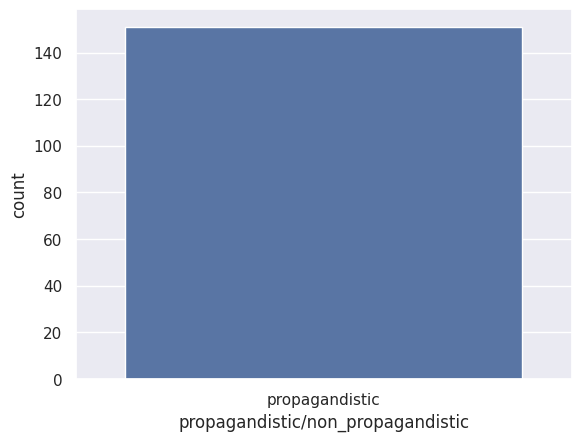

In [ ]:
sns.countplot(data = subtask2_val_data , x = 'propagandistic/non_propagandistic')
#As we meant

#Sub-dataset 1 (for non-propa)
[Reference](https://www.kaggle.com/datasets/thoughtvector/customer-support-on-twitter)   , only first 20,000 rows were used

In [ ]:
subdataset1 = pd.read_csv("/content/drive/MyDrive/SemEval Task4/Sub-dataset 1  (from Kaggle)/semeval2024_task4_subdataset1.csv", encoding="latin1") # semeval2024_task4_subdataset1.csv   (CHANGE HERE)
subdataset1

<ipython-input-47-35147386ed37>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,27,37,42,58,64,185) have mixed types. Specify dtype option on import or set low_memory=False.
  subdataset1 = pd.read_csv("/content/drive/MyDrive/SemEval Task4/Sub-dataset 1  (from Kaggle)/semeval2024_task4_subdataset1.csv", encoding="latin1") # semeval2024_task4_subdataset1.csv   (CHANGE HERE)


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185
0,1,sprintcare,FALSE,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,115712,TRUE,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,115712,TRUE,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,sprintcare,FALSE,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,115712,TRUE,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
subdataset1 = pd.DataFrame(subdataset1["text"])

In [ ]:
subdataset1 = subdataset1[subdataset1.index <= 14999]

In [ ]:
subdataset1

,text
0,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...
3,@115712 Please send us a Private Message so th...
4,@sprintcare I did.
...,...
14995,@120324 We don't have access to your account o...
14996,@AmazonHelp sent twice. Ask me if something el...
14997,@120324 I appreciate your understanding in thi...
14998,@120325 Apologies for the inconvenience. Have ...


In [ ]:
subdataset1_copy = subdataset1

In [ ]:
subdataset1_copy_text = subdataset1_copy.text

In [ ]:
texty2 = []

In [ ]:
for texty in list(subdataset1_copy_text):
  texty2.append(re.sub(r"@\S*", "", str(texty)))

In [ ]:
texty2

[' I understand. I would like to assist you. We would need to get you into a private secured link to further assist.',
 ' and how do you propose we do that',
 ' I have sent several private messages and no one is responding as usual',
 ' Please send us a Private Message so that we can further assist you. Just click â\x80\x98Messageâ\x80\x81Eat the top of your profile.',
 ' I did.',
 ' Can you please send us a private message, so that I can gain further details about your account?',
 ' is the worst customer service',
 ' This is saddening to hear. Please shoot us a DM, so that we can look into this for you. -KC',
 ' You gonna magically change your connectivity for me and my whole family ? ð\x9f¤¥ ð\x9f\x92¯',
 " We understand your concerns and we'd like for you to please send us a Direct Message, so that we can further assist you. -AA",
 ' Since I signed up with you....Since day 1',
 " H there! We'd definitely like to work with you on this, how long have you been experiencing this issue? 

In [ ]:
texty3 = []
for textyy in texty2:
  texty3.append(re.sub(r"https:\S+", "", str(textyy)))

In [ ]:
texty3

[' I understand. I would like to assist you. We would need to get you into a private secured link to further assist.',
 ' and how do you propose we do that',
 ' I have sent several private messages and no one is responding as usual',
 ' Please send us a Private Message so that we can further assist you. Just click â\x80\x98Messageâ\x80\x81Eat the top of your profile.',
 ' I did.',
 ' Can you please send us a private message, so that I can gain further details about your account?',
 ' is the worst customer service',
 ' This is saddening to hear. Please shoot us a DM, so that we can look into this for you. -KC',
 ' You gonna magically change your connectivity for me and my whole family ? ð\x9f¤¥ ð\x9f\x92¯',
 " We understand your concerns and we'd like for you to please send us a Direct Message, so that we can further assist you. -AA",
 ' Since I signed up with you....Since day 1',
 " H there! We'd definitely like to work with you on this, how long have you been experiencing this issue? 

In [ ]:
texty4 = [textyyy.lower() for textyyy in texty3]

In [ ]:
texty5 = [mytext for mytext in texty4 if mytext.isascii()]

In [ ]:
new_subdataset1 = pd.DataFrame(columns = [ "text"])
new_subdataset1

,text


In [ ]:
new_subdataset1["text"] = texty5

In [ ]:
new_subdataset1

,text
0,i understand. i would like to assist you. we ...
1,and how do you propose we do that
2,i have sent several private messages and no o...
3,i did.
4,"can you please send us a private message, so ..."
...,...
12281,we don't have access to your account over twi...
12282,sent twice. ask me if something else you need.
12283,i appreciate your understanding in this regar...
12284,apologies for the inconvenience. have you tri...


In [ ]:
subdataset1 = new_subdataset1

In [ ]:
subdataset1

,text
0,i understand. i would like to assist you. we ...
1,and how do you propose we do that
2,i have sent several private messages and no o...
3,i did.
4,"can you please send us a private message, so ..."
...,...
12281,we don't have access to your account over twi...
12282,sent twice. ask me if something else you need.
12283,i appreciate your understanding in this regar...
12284,apologies for the inconvenience. have you tri...


In [ ]:
subdataset1["propagandistic/non_propagandistic"] = ["non_propagandistic" for i in range(len(subdataset1))]

In [ ]:
subdataset1

,text,propagandistic/non_propagandistic
0,i understand. i would like to assist you. we ...,non_propagandistic
1,and how do you propose we do that,non_propagandistic
2,i have sent several private messages and no o...,non_propagandistic
3,i did.,non_propagandistic
4,"can you please send us a private message, so ...",non_propagandistic
...,...,...
12281,we don't have access to your account over twi...,non_propagandistic
12282,sent twice. ask me if something else you need.,non_propagandistic
12283,i appreciate your understanding in this regar...,non_propagandistic
12284,apologies for the inconvenience. have you tri...,non_propagandistic


In [ ]:
subdataset1.to_csv('SemEval_2024_Task4_Sub-dataset1_cleaned.csv', index=False)

#Concatenating train, val data of Subtask 1 and Subtask 2a  (named: "large_data1")

In [ ]:
large_data1 = pd.concat([subtask1_train_data, subtask1_val_data, subtask2_train_data, subtask2_val_data])

In [ ]:
large_data1

,text,propagandistic/non_propagandistic
0,this is why you need a sharpie with you at al...,propagandistic
1,good news! nazanin zaghari-ratcliffe and anoo...,propagandistic
2,paing phyo min is free!,propagandistic
3,move your ships away! oooook move your ships...,propagandistic
4,"when you're the fbi, they let you do it.",propagandistic
...,...,...
146,"melania, our first lady ... such a sweet spiri...",propagandistic
147,bro pls believe me bro russia strong the real ...,propagandistic
148,while revolutionaries as individuals can be mu...,propagandistic
149,a war in the middle east every us president i...,propagandistic


#Concatenated Data

In [ ]:
data_propa = pd.concat([train_data[train_data["propagandistic/non_propagandistic"]=="propagandistic"], train_data[train_data["propagandistic/non_propagandistic"]=="propagandistic"], large_data1], axis = 0)
data_nonpropa = pd.concat([train_data[train_data["propagandistic/non_propagandistic"]=="non_propagandistic"], train_data[train_data["propagandistic/non_propagandistic"]=="non_propagandistic"], subdataset1], axis = 0)

In [ ]:
data_propa

,text,propagandistic/non_propagandistic
0,donald trump: barack obama and joe biden will ...,propagandistic
1,00 10% for the big guy nancy's cut @immeme0 th...,propagandistic
3,i don't think you understood what i said. you ...,propagandistic
6,who's ready for more trump rallies? grea make ...,propagandistic
9,poverty isn't a character flaw. but choosing t...,propagandistic
...,...,...
146,"melania, our first lady ... such a sweet spiri...",propagandistic
147,bro pls believe me bro russia strong the real ...,propagandistic
148,while revolutionaries as individuals can be mu...,propagandistic
149,a war in the middle east every us president i...,propagandistic


In [ ]:
data_nonpropa

,text,propagandistic/non_propagandistic
2,"to much political posting online these days, s...",non_propagandistic
4,"if a liberal from 1960 showed up in 2018, he w...",non_propagandistic
5,do you approve of the job dr. fauci is doing?,non_propagandistic
7,ps1\nps4\nps2\nps5\nmaycam\n@maycamgames\nps3\...,non_propagandistic
8,"if you notice it, just leave a smile for me",non_propagandistic
...,...,...
12281,we don't have access to your account over twi...,non_propagandistic
12282,sent twice. ask me if something else you need.,non_propagandistic
12283,i appreciate your understanding in this regar...,non_propagandistic
12284,apologies for the inconvenience. have you tri...,non_propagandistic


In [ ]:
data_propa.set_axis([i for i in range(0, len(data_propa))], axis = 0, inplace = True)
data_propa9700 = data_propa[data_propa.index <= 11000]

data_nonpropa.set_axis([i for i in range(0, len(data_nonpropa))], axis = 0, inplace = True)
data_nonpropa9700 = data_nonpropa[data_nonpropa.index <= 11000]

<ipython-input-73-8d2e00f0dc33>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_propa.set_axis([i for i in range(0, len(data_propa))], axis = 0, inplace = True)
<ipython-input-73-8d2e00f0dc33>:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data_nonpropa.set_axis([i for i in range(0, len(data_nonpropa))], axis = 0, inplace = True)


In [ ]:
data_concat = pd.concat([data_propa9700, data_nonpropa9700])

In [ ]:
data_concat

,text,propagandistic/non_propagandistic
0,donald trump: barack obama and joe biden will ...,propagandistic
1,00 10% for the big guy nancy's cut @immeme0 th...,propagandistic
2,i don't think you understood what i said. you ...,propagandistic
3,who's ready for more trump rallies? grea make ...,propagandistic
4,poverty isn't a character flaw. but choosing t...,propagandistic
...,...,...
10996,"apologies for the situation, anurag. please s...",non_propagandistic
10997,because of amazon i purchased a product which...,non_propagandistic
10998,you are not understanding my situation n ange...,non_propagandistic
10999,"be assured, we've shared your comments with i...",non_propagandistic


In [ ]:
data_concat_shuffled = data_concat.sample(frac=1, random_state=0, ignore_index=True).sample(frac=1, random_state=0, ignore_index=True).sample(frac=1, random_state=0, ignore_index=True)

In [ ]:
data_concat_shuffled

,text,propagandistic/non_propagandistic
0,we're here to help! send us a dm with your em...,non_propagandistic
1,then now raise your hand if jill should res...,propagandistic
2,"hello, this does not sound good. can you dm ...",non_propagandistic
3,"sorry for the delay, katie! we'd like to inve...",non_propagandistic
4,you should have to pass a drug test to receive...,propagandistic
...,...,...
20769,writing for facerook tio apoloigai td mlrldott...,propagandistic
20770,"hey matthew, flight 783 is showing a late arr...",non_propagandistic
20771,"if the permissions cannot be disabled, they m...",non_propagandistic
20772,isn't prime two day shipping supposed to be g...,non_propagandistic


In [ ]:
data_concat_shuffled.to_csv("task4_data_concat_extended5.csv", index = False)